best_x: [ 0.99072759 -0.06825242 -0.97999291  0.26343933] 
 best_y: [0.30003106]


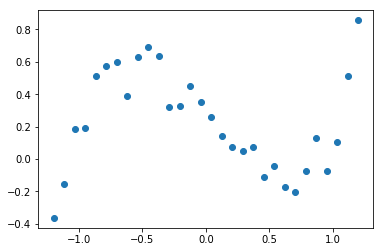

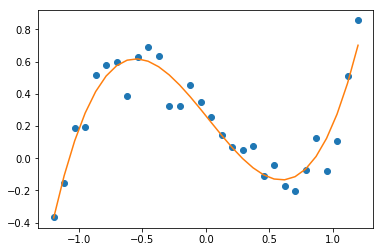

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sko.GA import GA

#print(np.random.rand(30))

# 生成数据
x_true = np.linspace(-1.2, 1.2, 30)
# 3阶的y
y_true = x_true ** 3 - x_true + 0.4 * np.random.rand(30)
# 可视化
plt.plot(x_true, y_true, 'o')

# 计算预测结果
def f_fun(x, a, b, c, d):
	return a * x ** 3 + b * x ** 2 + c * x + d

# 计算loss
def obj_fun(p):
	a, b, c, d = p
	# 计算残差 loss
	loss = np.square(f_fun(x_true, a, b, c, d) - y_true).sum()
	return loss

# 使用 scikit-opt 做最优化
ga = GA(func=obj_fun, n_dim=4, size_pop=100, max_iter=500, lb=[-2] * 4, ub=[2] * 4)
best_params, loss = ga.run()
print('best_x:', best_params, '\n', 'best_y:', loss)

# 画出拟合效果图
# 得到预测值
y_predict = f_fun(x_true, *best_params)
fig, ax = plt.subplots()
ax.plot(x_true, y_true, 'o')
ax.plot(x_true, y_predict, '-')
plt.show()


[[0.         0.0859003  0.58602834 ... 0.94711867 0.48612069 0.49005161]
 [0.0859003  0.         0.63337288 ... 1.02249676 0.56774601 0.56758664]
 [0.58602834 0.63337288 0.         ... 0.52933594 0.69099337 0.31415587]
 ...
 [0.94711867 1.02249676 0.52933594 ... 0.         0.73204928 0.45788493]
 [0.48612069 0.56774601 0.69099337 ... 0.73204928 0.         0.39119003]
 [0.49005161 0.56758664 0.31415587 ... 0.45788493 0.39119003 0.        ]]


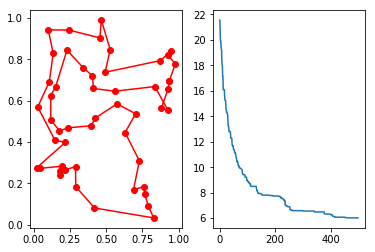

In [8]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

# 城市的数量
num_points = 50

# 生成点坐标
points_coordinate = np.random.rand(num_points, 2)
# 计算两点之间的距离
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
print(distance_matrix)


# 目标函数，输入路径 返回总距离
# 使用方式：compute_distance(np.arange(num_points))
def compute_distance(routine):
    num_points, = routine.shape
    #print(routine)
    #print(routine.shape)
    # 求和
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


# 遗传算法
from sko.GA import GA_TSP
# prob_mut 种群的新成员由变异而非交叉得来的概率
ga_tsp = GA_TSP(func=compute_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=0.2)
best_points, best_distance = ga_tsp.run()

# 画图
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()


In [12]:
? print